<a href="https://colab.research.google.com/github/kozen88/HCV_DM23/blob/main/Addestramento_modelli_basti_su_percettrone_e_su_regressione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Addestramento di modelli basati sulla regressione lineare e sul percettrone.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
sb.set()

In [ ]:
df = pd.read_csv('HCV-Egy-Data.csv', delimiter=',')
print(df)

In [ ]:
df_reduced = pd.read_csv('pca_reduced_df_uncleaned.csv', delimiter=',')
print(df_reduced)

## Perceptron model

In [5]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# effettuiamo la divisione tra feature di input e feature target
X = df.drop('Baselinehistological staging', axis=1)
y = df['Baselinehistological staging']

# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Istanziazione di un modello Perceptron
perceptron = Perceptron(max_iter=100, eta0=0.1, random_state=42)

# usiamo la cross-val
scores = cross_val_score(perceptron, X, y, cv=10)
mean_accurancy = scores.mean()
print("Accurancy su ogni ciclo della cross-validation:", scores)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy)

Accurancy su ogni ciclo della cross-validation: [0.25899281 0.20863309 0.25179856 0.24460432 0.24460432 0.22463768
 0.23913043 0.23913043 0.23188406 0.23913043]
Accurancy mediata su i 10 fold fatti: 0.23825461370034412


In [6]:
# creiamo questa funzione di addestramento per automatizzare i nostri esperimenti
def evaluate_classifiers(cv_values, classifiers, X, y):
    for classifier in classifiers:
        print("Classifier:", classifier)
        for cv in cv_values:
            model = classifier()
            scores = cross_val_score(model, X, y, cv=cv)
            mean_accuracy = scores.mean()
            print("CV:", cv)
            print("Mean Accuracy:", mean_accuracy)
            print("Scores:", scores)
            print("__________________________________________________________________________")
            print("##########################################################################")
            print(" ")

In [9]:
def evaluate_classifiers_with_plot(cv_values, classifiers, X, y, step):
    for classifier in classifiers:
        print("Classifier:", classifier)
        mean_accuracies_list = []
        for cv in cv_values:
            model = classifier()
            scores = cross_val_score(model, X, y, cv=cv)
            mean_accuracy = scores.mean()
            mean_accuracies_list.append(mean_accuracy)
            print("CV:", cv)
            print("Mean Accuracy:", mean_accuracy)
            print("Scores:", scores)
            print("__________________________________________________________________________")
            print("##########################################################################")
            print(" ")

        # Plotting the mean accuracies
        cv_range = np.array(cv_values)
        plt.plot(cv_range, mean_accuracies_list)
        plt.xticks(np.arange(0, max(cv_range) + 1, step))
        plt.xlabel('Number of folds (cv)')
        plt.ylabel('Mean Accuracy')
        plt.title('Cross-Validation Mean Accuracy')
        plt.show()

In [8]:
values = [5, 10, 15, 20]
classifier_model = [Perceptron]

evaluate_classifiers(values, classifier_model, X, y)

Classifier: <class 'sklearn.linear_model._perceptron.Perceptron'>
CV: 5
Mean Accuracy: 0.23826714801444043
Scores: [0.23826715 0.25631769 0.22743682 0.24187726 0.22743682]
__________________________________________________________________________
##########################################################################
 
CV: 10
Mean Accuracy: 0.25128245229903035
Scores: [0.24460432 0.23741007 0.24460432 0.25899281 0.24460432 0.26811594
 0.23913043 0.26086957 0.26086957 0.25362319]
__________________________________________________________________________
##########################################################################
 
CV: 15
Mean Accuracy: 0.2613682406108774
Scores: [0.24731183 0.24731183 0.27956989 0.24731183 0.29032258 0.26086957
 0.26086957 0.26086957 0.25       0.23913043 0.25       0.26086957
 0.26086957 0.29347826 0.27173913]
__________________________________________________________________________
####################################################################

Output streaming troncato alle ultime 5000 righe.
 0.25       0.25       0.         0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.375      0.25
 0.25       0.25       0.25       0.         0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.375      0.25       0.25       0.25       0.25
 0.375      0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.125      0.25       0.375      0.25
 0.125      0.25       0.25       0.25       0.25       0.125
 0.25       0.25       0.125      0.25       0.25       0.125
 0.25       0.25       0.375      0.25       0.25       0.25
 0.25       0.125      0.25       0.25       0.25       0.25
 0.125      0.375      0.         0.375      0.25       0.25
 0.25       0.125      0.25       0.25       0.125      0.25
 0.25       0.375      0.25       0.         0.125      0.25
 0.375      0.125      0.25       0.25       0.25       0.25
 0.125      0.375      0.75      

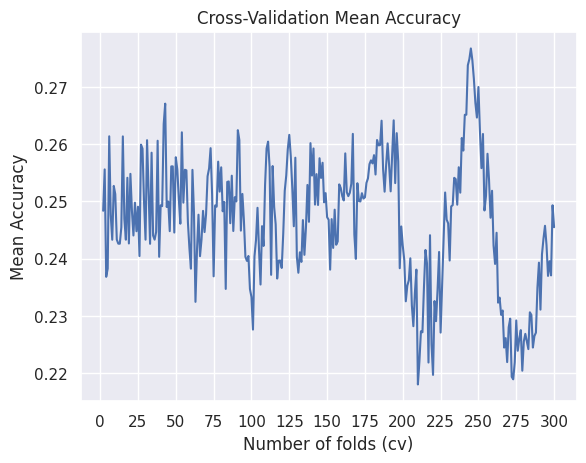

In [12]:
# con questo codice andiamo a cercare di ottimizzare la cross-validation
list_cv = range(2,301) # questo esperimento è stato condotto con 30, 100, 300 fold che sono stati documentati
evaluate_classifiers_with_plot(list_cv, classifier_model, X, y, 25)

#### Coclusioni sul perceptron model
Questo modello sembra oscillare molto nel range 24% 26% di accurancy e con l'aumentare dei fold tende a peggiorare le performance e ad oscillare maggiormente.

Adesso proviamo ad addestrare una rete neurale a più strati e vediamo come si comporta rispetto al nostro problema.

In [14]:
from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# usiamo la cross-val
scores_MLP = cross_val_score(mlp, X, y, cv=10)
mean_accurancyMLP = scores_MLP.mean()
print("Accurancy su ogni ciclo della cross-validation:", scores_MLP)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancyMLP)

Accurancy su ogni ciclo della cross-validation: [0.26618705 0.22302158 0.20863309 0.25179856 0.28776978 0.23913043
 0.20289855 0.26086957 0.2173913  0.23913043]
Accurancy mediata su i 10 fold fatti: 0.23968303617975187


In [16]:
classifier_modelMLP = [MLPClassifier]

evaluate_classifiers(values,classifier_modelMLP , X, y)

Classifier: <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
CV: 5
Mean Accuracy: 0.2490974729241877
Scores: [0.28519856 0.27075812 0.22021661 0.22743682 0.24187726]
__________________________________________________________________________
##########################################################################
 
CV: 10
Mean Accuracy: 0.25780419142946515
Scores: [0.28776978 0.25899281 0.25899281 0.25179856 0.17266187 0.30434783
 0.28985507 0.23913043 0.27536232 0.23913043]
__________________________________________________________________________
##########################################################################
 
CV: 15
Mean Accuracy: 0.2570126227208976
Scores: [0.2688172  0.23655914 0.35483871 0.20430108 0.25806452 0.19565217
 0.22826087 0.29347826 0.26086957 0.17391304 0.30434783 0.19565217
 0.27173913 0.29347826 0.31521739]
__________________________________________________________________________
#####################################################

Classifier: <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
CV: 2
Mean Accuracy: 0.2591949636747325
Scores: [0.27417027 0.24421965]
__________________________________________________________________________
##########################################################################
 
CV: 3
Mean Accuracy: 0.2382658315413196
Scores: [0.24675325 0.23160173 0.23644252]
__________________________________________________________________________
##########################################################################
 
CV: 4
Mean Accuracy: 0.2534627942229848
Scores: [0.2074928  0.27456647 0.28323699 0.24855491]
__________________________________________________________________________
##########################################################################
 
CV: 5
Mean Accuracy: 0.25415162454873647
Scores: [0.24548736 0.27075812 0.25270758 0.26714801 0.23465704]
__________________________________________________________________________
################################

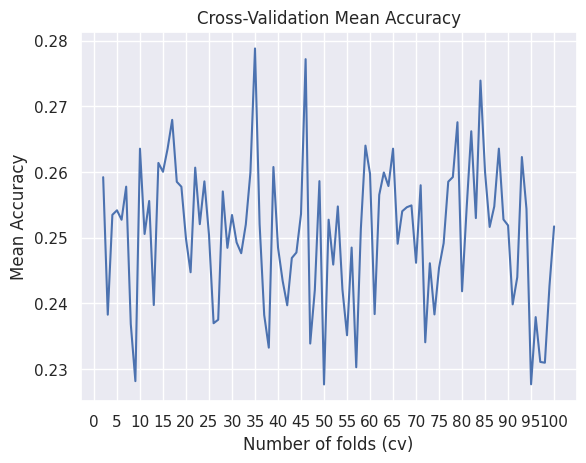

In [18]:
# con questo codice andiamo a cercare di ottimizzare la cross-validation
# questo esperimento è stato condotto con 30, 100 fold che sono stati documentati
# quello a 300 evitato poichè quello a 100 ha impiegato 33 min
evaluate_classifiers_with_plot(range(2,101), classifier_modelMLP, X, y, 5)

#### Conclusioni sul modello MultiLayer-Perceptron


## Logistic Regression


In [21]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression model with 'multinomial' solver
logistic_regression = LogisticRegression(multi_class='multinomial',max_iter=1000, solver='lbfgs', random_state=42)

# usiamo la cross-val
scores_LR = cross_val_score(logistic_regression, X, y, cv=10)
mean_accurancy_LR = scores_LR.mean()
print("Accurancy su ogni ciclo della cross-validation:", scores_LR)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy_LR)

Accurancy su ogni ciclo della cross-validation: [0.29496403 0.22302158 0.27338129 0.20863309 0.25899281 0.24637681
 0.23913043 0.2826087  0.30434783 0.26086957]
Accurancy mediata su i 10 fold fatti: 0.25923261390887287


In [26]:
# funzione di supporto creata per riuscire a lavorare con la logistic regression
# Define the evaluate_classifiers function
def eval_clf(cv_values, classifiers, X, y):
    for classifier in classifiers:
        print("Classifier:", classifier)
        for cv in cv_values:
            model = classifier
            scores = cross_val_score(model, X, y, cv=cv)
            mean_accuracy = scores.mean()
            print(f"Cross-validation: {cv}, Mean Accuracy: {mean_accuracy}")


In [29]:
# Andiamo a verificare le performance della logistic regression sui principali
# valori di fold usati per la cross-val
# evaluate_classifiers(values,classifier_modelLR , X, y)
eval_clf(values, [logistic_regression], X, y)

Classifier: LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)
Cross-validation: 5, Mean Accuracy: 0.2505415162454874
Cross-validation: 10, Mean Accuracy: 0.25923261390887287
Cross-validation: 15, Mean Accuracy: 0.2606513947327411
Cross-validation: 20, Mean Accuracy: 0.26137681159420295


In [37]:
# funzione di supporto per riuscire a lavorare con la loggistic regression
def eval_clf_with_plot(cv_values, classifier_functions, X, y, step):
    for classifier_fn in classifier_functions:
        if callable(classifier_fn):
            print("Classifier:", classifier_fn.__name__)
        else:
            print("Classifier:", type(classifier_fn).__name__)
        mean_accuracies_list = []
        for cv in cv_values:
            if callable(classifier_fn):
                model = classifier_fn()
            else:
                model = classifier_fn
            scores = cross_val_score(model, X, y, cv=cv)
            mean_accuracy = scores.mean()
            mean_accuracies_list.append(mean_accuracy)
            print("CV:", cv)
            print("Mean Accuracy:", mean_accuracy)
            print("Scores:", scores)
            print("__________________________________________________________________________")
            print("##########################################################################")
            print(" ")

        # Plotting the mean accuracies
        cv_range = np.array(cv_values)
        plt.plot(cv_range, mean_accuracies_list)
        plt.xticks(np.arange(0, max(cv_range) + 1, step))
        plt.xlabel('Number of folds (cv)')
        plt.ylabel('Mean Accuracy')
        plt.title('Cross-Validation Mean Accuracy')
        plt.show()


In [34]:
def logistic_regression():
    return LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

Classifier: LogisticRegression
CV: 2
Mean Accuracy: 0.24837870863882427
Scores: [0.24386724 0.25289017]
__________________________________________________________________________
##########################################################################
 
CV: 3
Mean Accuracy: 0.2454949244537097
Scores: [0.23160173 0.24891775 0.25596529]
__________________________________________________________________________
##########################################################################
 
CV: 4
Mean Accuracy: 0.2512847528776799
Scores: [0.22190202 0.24566474 0.24566474 0.29190751]
__________________________________________________________________________
##########################################################################
 
CV: 5
Mean Accuracy: 0.2505415162454874
Scores: [0.23465704 0.27075812 0.23104693 0.23826715 0.27797834]
__________________________________________________________________________
##########################################################################
 
CV: 6


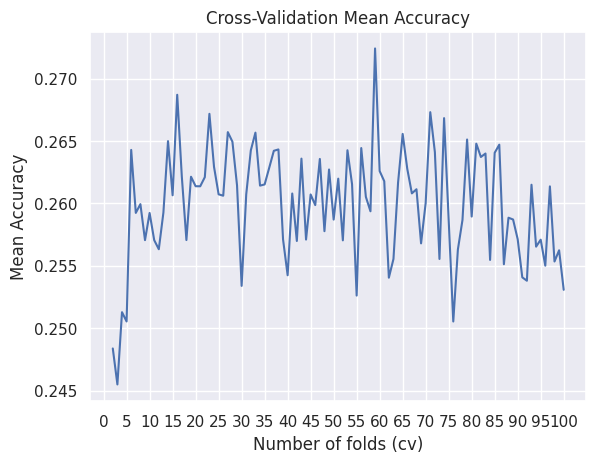

In [39]:
# con questo codice andiamo a cercare di ottimizzare la cross-validation
# questo esperimento è stato condotto con 30, 100 fold che sono stati documentati
# ci siamo astenuti da provare con 300 per il tempo impiegato su 100 ovvero 20 min
eval_clf_with_plot(range(2,101), [logistic_regression()], X, y, 5)

#### Conclusioni sulla logistic regression
La logistic regression non ci ha portato ai risultati che volevamo raggiungere ad ogni modo il modello oscilla in un range stretto ovvero il centro di tali oscillazione è 26% di accurancy questo sgnifica che potrebbe essere un tra i modelli cha saranno selezionati come migliori per successivi esperimenti.

## Ridge Classifier

In [40]:
from sklearn.linear_model import RidgeClassifier

# Istanziazione di un modello RidgeClassifier
ridge_classifier = RidgeClassifier()

# usiamo la cross-val
scores_RC = cross_val_score(ridge_classifier, X, y, cv=10)
mean_accurancy_RC = scores_RC.mean()
print("Accurancy su ogni ciclo della cross-validation:", scores_RC)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy_RC)

Accurancy su ogni ciclo della cross-validation: [0.24460432 0.24460432 0.25899281 0.25899281 0.25899281 0.22463768
 0.23188406 0.25362319 0.22463768 0.25362319]
Accurancy mediata su i 10 fold fatti: 0.24545928474611617


In [41]:
# Andiamo a verificare le performance del ridge classifier sui principali
# valori di fold usati per la cross-val
classifier_modelRC = [RidgeClassifier]
evaluate_classifiers(values,classifier_modelRC , X, y)

Classifier: <class 'sklearn.linear_model._ridge.RidgeClassifier'>
CV: 5
Mean Accuracy: 0.23321299638989168
Scores: [0.22743682 0.25631769 0.20938628 0.22382671 0.24909747]
__________________________________________________________________________
##########################################################################
 
CV: 10
Mean Accuracy: 0.24545928474611617
Scores: [0.24460432 0.24460432 0.25899281 0.25899281 0.25899281 0.22463768
 0.23188406 0.25362319 0.22463768 0.25362319]
__________________________________________________________________________
##########################################################################
 
CV: 15
Mean Accuracy: 0.25848527349228617
Scores: [0.2688172  0.2688172  0.25806452 0.24731183 0.24731183 0.26086957
 0.2826087  0.29347826 0.19565217 0.23913043 0.30434783 0.20652174
 0.23913043 0.32608696 0.23913043]
__________________________________________________________________________
###################################################################

Classifier: <class 'sklearn.linear_model._ridge.RidgeClassifier'>
CV: 2
Mean Accuracy: 0.2505400829100251
Scores: [0.25252525 0.24855491]
__________________________________________________________________________
##########################################################################
 
CV: 3
Mean Accuracy: 0.24622894579510626
Scores: [0.24458874 0.22077922 0.27331887]
__________________________________________________________________________
##########################################################################
 
CV: 4
Mean Accuracy: 0.24332011793906483
Scores: [0.24495677 0.24566474 0.21965318 0.26300578]
__________________________________________________________________________
##########################################################################
 
CV: 5
Mean Accuracy: 0.23321299638989168
Scores: [0.22743682 0.25631769 0.20938628 0.22382671 0.24909747]
__________________________________________________________________________
##############################################

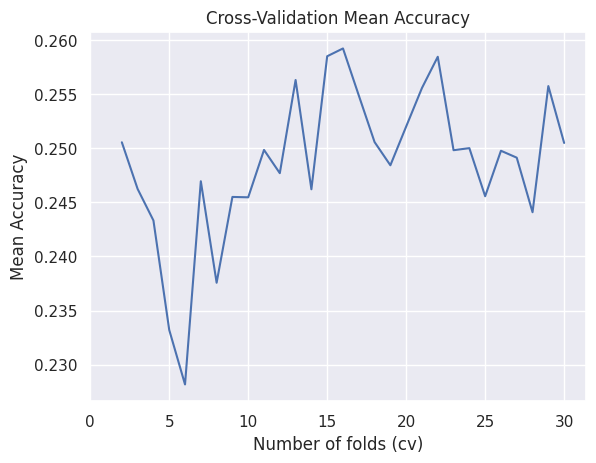

In [44]:
# con questo codice andiamo a cercare di ottimizzare la cross-validation
# questo esperimento è stato condotto con 30, 100, 300 fold che sono stati documentati
evaluate_classifiers_with_plot(range(2,31), classifier_modelRC, X, y, 5)

#### Conclusioni sul Ridge Classifier
Notiamo come i metodi basati sulla regressione siano abbastanza solidi ovvero non tendono ad oscillare trroppo e si mantengono sui range che stiamo crcando di capire per selezionare i migliori modelli. Per il ridge classifier comunque non sembra esserci almeno per ora la possibilità di selezionarlo.

## SVM support vector macchine

In [61]:
from sklearn.svm import LinearSVC,SVC, NuSVC

# Istanziazione di un modello SVM
linear_svc = LinearSVC(max_iter=100, random_state=42)

# usiamo la cross-val
scores_SVM = cross_val_score(linear_svc, X, y, cv=10)
mean_accurancy_SVM = scores_SVM.mean()
print("Accurancy su ogni ciclo della cross-validation:", scores_SVM)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy_SVM)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Accurancy su ogni ciclo della cross-validation: [0.24460432 0.24460432 0.32374101 0.25179856 0.25899281 0.26086957
 0.2826087  0.26086957 0.26086957 0.24637681]
Accurancy mediata su i 10 fold fatti: 0.26353352100927957


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [54]:
# Andiamo a verificare le performance del ridge classifier sui principali
# valori di fold usati per la cross-val
classifier_modelSVM = [LinearSVC]
evaluate_classifiers(values,classifier_modelSVM , X, y)

Classifier: <class 'sklearn.svm._classes.LinearSVC'>


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CV: 5
Mean Accuracy: 0.23971119133574006
Scores: [0.24187726 0.24187726 0.23465704 0.24187726 0.23826715]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 10
Mean Accuracy: 0.24836826191220934
Scores: [0.24460432 0.24460432 0.26618705 0.25179856 0.24460432 0.22463768
 0.23188406 0.23913043 0.26086957 0.27536232]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 15
Mean Accuracy: 0.25129343930185444
Scores: [0.24731183 0.2688172  0.25806452 0.24731183 0.19354839 0.22826087
 0.30434783 0.20652174 0.23913043 0.26086957 0.27173913 0.26086957
 0.2173913  0.30434783 0.26086957]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 20
Mean Accuracy: 0.25051759834368537
Scores: [0.28571429 0.27142857 0.24285714 0.25714286 0.22857143 0.23188406
 0.26086957 0.24637681 0.26086957 0.24637681 0.23188406 0.30434783
 0.24637681 0.20289855 0.24637681 0.24637681 0.24637681 0.27536232
 0.2173913  0.26086957]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classifier: <class 'sklearn.svm._classes.LinearSVC'>


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CV: 2
Mean Accuracy: 0.24403510747441384
Scores: [0.25541126 0.23265896]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CV: 3
Mean Accuracy: 0.2606746109999906
Scores: [0.23593074 0.25108225 0.29501085]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CV: 4
Mean Accuracy: 0.24333885825656743
Scores: [0.21902017 0.25433526 0.25722543 0.24277457]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CV: 5
Mean Accuracy: 0.25559566787003607
Scores: [0.28880866 0.23826715 0.26353791 0.23104693 0.25631769]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 6
Mean Accuracy: 0.2656879352531526
Scores: [0.25974026 0.27272727 0.26406926 0.28138528 0.27272727 0.24347826]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 7
Mean Accuracy: 0.25559437742178864
Scores: [0.26262626 0.24242424 0.2979798  0.23737374 0.25757576 0.23737374
 0.25380711]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 8
Mean Accuracy: 0.26138628662547336
Scores: [0.24137931 0.26011561 0.26589595 0.26011561 0.25433526 0.25433526
 0.28323699 0.2716763 ]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 9
Mean Accuracy: 0.26572447160682455
Scores: [0.25324675 0.24675325 0.2987013  0.25974026 0.23376623 0.25974026
 0.29220779 0.25324675 0.29411765]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 10
Mean Accuracy: 0.2563236367427797
Scores: [0.23741007 0.25179856 0.29496403 0.24460432 0.24460432 0.23913043
 0.3115942  0.2173913  0.2826087  0.23913043]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 11
Mean Accuracy: 0.26573160173160165
Scores: [0.23809524 0.23809524 0.23809524 0.23809524 0.25396825 0.24603175
 0.32539683 0.33333333 0.26190476 0.24603175 0.304     ]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 12
Mean Accuracy: 0.2584895052473763
Scores: [0.26724138 0.24137931 0.25862069 0.25862069 0.25862069 0.26086957
 0.24347826 0.24347826 0.26956522 0.26956522 0.27826087 0.25217391]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 13
Mean Accuracy: 0.2599188855581026
Scores: [0.26168224 0.22429907 0.24299065 0.28971963 0.26168224 0.28971963
 0.26168224 0.26415094 0.25471698 0.26415094 0.28301887 0.23584906
 0.24528302]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 14
Mean Accuracy: 0.2534160850487381
Scores: [0.25252525 0.24242424 0.25252525 0.24242424 0.24242424 0.31313131
 0.25252525 0.25252525 0.27272727 0.26262626 0.26262626 0.23232323
 0.23232323 0.23469388]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 15
Mean Accuracy: 0.24978182951534988
Scores: [0.27956989 0.2688172  0.21505376 0.27956989 0.25806452 0.26086957
 0.27173913 0.22826087 0.23913043 0.26086957 0.23913043 0.23913043
 0.22826087 0.23913043 0.23913043]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 16
Mean Accuracy: 0.26721631916599836
Scores: [0.32183908 0.25287356 0.25287356 0.26436782 0.28735632 0.25287356
 0.24137931 0.24137931 0.1954023  0.24418605 0.25581395 0.29069767
 0.23255814 0.29069767 0.29069767 0.36046512]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 17
Mean Accuracy: 0.2577625449457109
Scores: [0.24390244 0.2195122  0.31707317 0.25609756 0.26829268 0.25609756
 0.25609756 0.24390244 0.2345679  0.2345679  0.28395062 0.27160494
 0.27160494 0.2962963  0.2345679  0.24691358 0.24691358]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 18
Mean Accuracy: 0.25484164957849165
Scores: [0.25974026 0.31168831 0.25974026 0.20779221 0.25974026 0.24675325
 0.25974026 0.2987013  0.22077922 0.27272727 0.23376623 0.33766234
 0.22077922 0.23376623 0.22077922 0.25974026 0.27272727 0.21052632]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 19
Mean Accuracy: 0.26568132660418164
Scores: [0.34246575 0.26027397 0.23287671 0.26027397 0.30136986 0.34246575
 0.26027397 0.24657534 0.24657534 0.30136986 0.21917808 0.26027397
 0.21917808 0.24657534 0.23287671 0.31506849 0.26027397 0.26388889
 0.23611111]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 20
Mean Accuracy: 0.2649585921325052
Scores: [0.25714286 0.3        0.25714286 0.28571429 0.25714286 0.31884058
 0.24637681 0.24637681 0.26086957 0.2173913  0.2173913  0.24637681
 0.27536232 0.2173913  0.2173913  0.26086957 0.26086957 0.26086957
 0.30434783 0.39130435]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 21
Mean Accuracy: 0.25918525918525914
Scores: [0.27272727 0.25757576 0.31818182 0.27272727 0.28787879 0.24242424
 0.24242424 0.24242424 0.28787879 0.28787879 0.25757576 0.15151515
 0.31818182 0.27272727 0.25757576 0.25757576 0.24242424 0.22727273
 0.27272727 0.24242424 0.23076923]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 22
Mean Accuracy: 0.24982544337383047
Scores: [0.25396825 0.3015873  0.26984127 0.23809524 0.26984127 0.23809524
 0.22222222 0.17460317 0.20634921 0.25396825 0.23809524 0.25396825
 0.26984127 0.23809524 0.22222222 0.26984127 0.31746032 0.25396825
 0.25396825 0.23809524 0.25396825 0.25806452]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 23
Mean Accuracy: 0.24537894986932765
Scores: [0.36065574 0.24590164 0.24590164 0.31147541 0.21311475 0.3
 0.25       0.25       0.26666667 0.23333333 0.16666667 0.23333333
 0.2        0.23333333 0.23333333 0.3        0.26666667 0.23333333
 0.16666667 0.25       0.21666667 0.25       0.21666667]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 24
Mean Accuracy: 0.24766838072191977
Scores: [0.25862069 0.27586207 0.25862069 0.24137931 0.20689655 0.18965517
 0.25862069 0.25862069 0.32758621 0.25862069 0.24137931 0.18965517
 0.24137931 0.24137931 0.24137931 0.24137931 0.25862069 0.22807018
 0.22807018 0.26315789 0.28070175 0.24561404 0.24561404 0.26315789]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 25
Mean Accuracy: 0.25059740259740265
Scores: [0.25       0.26785714 0.25       0.19642857 0.23214286 0.25
 0.25       0.26785714 0.25       0.21428571 0.23636364 0.23636364
 0.18181818 0.23636364 0.27272727 0.23636364 0.21818182 0.32727273
 0.25454545 0.29090909 0.29090909 0.25454545 0.27272727 0.27272727
 0.25454545]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 26
Mean Accuracy: 0.24912648497554157
Scores: [0.27777778 0.24074074 0.25925926 0.24074074 0.18518519 0.24074074
 0.25925926 0.26415094 0.24528302 0.24528302 0.24528302 0.24528302
 0.16981132 0.20754717 0.24528302 0.24528302 0.24528302 0.24528302
 0.39622642 0.24528302 0.30188679 0.24528302 0.22641509 0.24528302
 0.30188679 0.20754717]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 27
Mean Accuracy: 0.25054466230936817
Scores: [0.25       0.19230769 0.25       0.32692308 0.23076923 0.25
 0.25       0.25       0.23529412 0.31372549 0.19607843 0.2745098
 0.19607843 0.23529412 0.23529412 0.23529412 0.23529412 0.23529412
 0.31372549 0.31372549 0.25490196 0.21568627 0.35294118 0.17647059
 0.25490196 0.25490196 0.23529412]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 28
Mean Accuracy: 0.25123906705539356
Scores: [0.24       0.24       0.24       0.24       0.24       0.24
 0.24       0.26       0.32       0.24       0.24       0.3
 0.26       0.20408163 0.2244898  0.28571429 0.28571429 0.24489796
 0.24489796 0.28571429 0.26530612 0.26530612 0.26530612 0.20408163
 0.2244898  0.24489796 0.2244898  0.26530612]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 29
Mean Accuracy: 0.25350024455857173
Scores: [0.25       0.25       0.22916667 0.25       0.25       0.25
 0.25       0.25       0.1875     0.27083333 0.25       0.25
 0.25       0.27083333 0.33333333 0.20833333 0.16666667 0.25
 0.22916667 0.25       0.25       0.33333333 0.25531915 0.23404255
 0.31914894 0.27659574 0.23404255 0.27659574 0.27659574]
__________________________________________________________________________
##########################################################################
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV: 30
Mean Accuracy: 0.24979956830095593
Scores: [0.27659574 0.25531915 0.23404255 0.25531915 0.25531915 0.17391304
 0.26086957 0.2173913  0.30434783 0.26086957 0.19565217 0.2826087
 0.2173913  0.39130435 0.10869565 0.2826087  0.23913043 0.26086957
 0.23913043 0.26086957 0.23913043 0.2826087  0.23913043 0.23913043
 0.26086957 0.26086957 0.23913043 0.23913043 0.26086957 0.26086957]
__________________________________________________________________________
##########################################################################
 


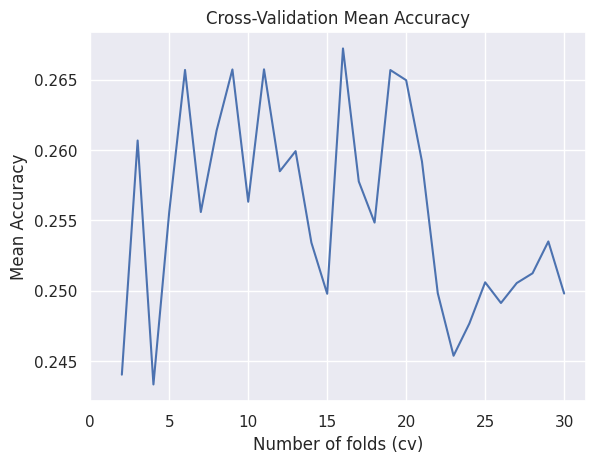

In [55]:
# con questo codice andiamo a cercare di ottimizzare la cross-validation
# questo esperimento è stato condotto con 30, 100, 300 fold che sono stati documentati
evaluate_classifiers_with_plot(range(2,31), classifier_modelSVM, X, y, 5)

In [62]:
# istanziazzione di un modello NuSvc
nusvc = NuSVC()

# usiamo la cross-val
scores_NuSVC= cross_val_score(nusvc, X, y, cv=10)
mean_accurancy_NuSVC = scores_NuSVC.mean()
print("Accurancy su ogni ciclo della cross-validation:", scores_NuSVC)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy_NuSVC)

Accurancy su ogni ciclo della cross-validation: [0.31654676 0.26618705 0.22302158 0.22302158 0.20863309 0.23913043
 0.30434783 0.35507246 0.2173913  0.20289855]
Accurancy mediata su i 10 fold fatti: 0.25562506516525907


In [65]:
# Andiamo a verificare le performance del NuSVC sui principali
# valori di fold usati per la cross-val
classifier_modelNuSVC = [NuSVC]
evaluate_classifiers(values, classifier_modelNuSVC, X, y)

Classifier: <class 'sklearn.svm._classes.NuSVC'>
CV: 5
Mean Accuracy: 0.2490974729241877
Scores: [0.25270758 0.23104693 0.25270758 0.2599278  0.24909747]
__________________________________________________________________________
##########################################################################
 
CV: 10
Mean Accuracy: 0.25562506516525907
Scores: [0.31654676 0.26618705 0.22302158 0.22302158 0.20863309 0.23913043
 0.30434783 0.35507246 0.2173913  0.20289855]
__________________________________________________________________________
##########################################################################
 
CV: 15
Mean Accuracy: 0.2203443976936263
Scores: [0.19354839 0.23655914 0.15053763 0.21505376 0.12903226 0.23913043
 0.18478261 0.22826087 0.27173913 0.25       0.26086957 0.27173913
 0.2173913  0.22826087 0.22826087]
__________________________________________________________________________
##########################################################################
 
CV: 20
Me

Classifier: <class 'sklearn.svm._classes.NuSVC'>
CV: 2
Mean Accuracy: 0.24692736614701932
Scores: [0.25252525 0.24132948]
__________________________________________________________________________
##########################################################################
 
CV: 3
Mean Accuracy: 0.2592096984721714
Scores: [0.26623377 0.24675325 0.26464208]
__________________________________________________________________________
##########################################################################
 
CV: 4
Mean Accuracy: 0.263528426979394
Scores: [0.27665706 0.25433526 0.24277457 0.28034682]
__________________________________________________________________________
##########################################################################
 
CV: 5
Mean Accuracy: 0.2490974729241877
Scores: [0.25270758 0.23104693 0.25270758 0.2599278  0.24909747]
__________________________________________________________________________
##################################################################

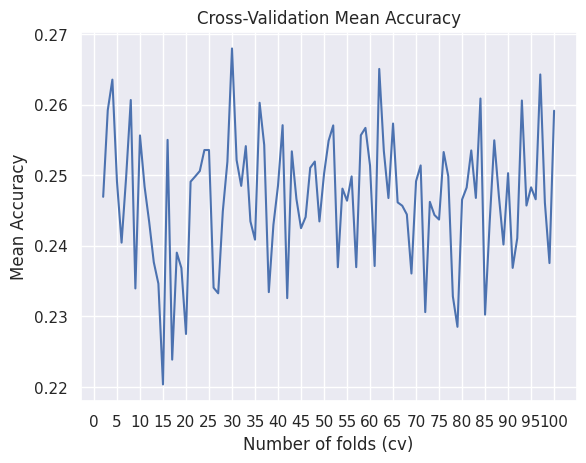

In [68]:
# con questo codice andiamo a cercare di ottimizzare la cross-validation
# questo esperimento è stato condotto con 30, 100 fold che sono stati documentati
evaluate_classifiers_with_plot(range(2,101), classifier_modelNuSVC, X, y, 5)

In [69]:
# Istanziazzione di un modello SVC il quale è un SVM che usa il coefficient C
svc = SVC()

# usiamo la cross-val
scores_SVC2= cross_val_score(svc, X, y, cv=10)
mean_accurancy_SVC2 = scores_SVC2.mean()
print("Accurancy su ogni ciclo della cross-validation:", scores_SVC2)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy_SVC2)

Accurancy su ogni ciclo della cross-validation: [0.24460432 0.26618705 0.25899281 0.26618705 0.28776978 0.25362319
 0.24637681 0.26086957 0.26086957 0.2173913 ]
Accurancy mediata su i 10 fold fatti: 0.25628714419768533


In [70]:
# Andiamo a verificare le performance del SVC sui principali
# valori di fold usati per la cross-val
classifier_modelSVC2 = [SVC]
evaluate_classifiers(values, classifier_modelSVC2, X, y)

Classifier: <class 'sklearn.svm._classes.SVC'>
CV: 5
Mean Accuracy: 0.25415162454873647
Scores: [0.23826715 0.26353791 0.24187726 0.26714801 0.2599278 ]
__________________________________________________________________________
##########################################################################
 
CV: 10
Mean Accuracy: 0.25628714419768533
Scores: [0.24460432 0.26618705 0.25899281 0.26618705 0.28776978 0.25362319
 0.24637681 0.26086957 0.26086957 0.2173913 ]
__________________________________________________________________________
##########################################################################
 
CV: 15
Mean Accuracy: 0.24474053295932674
Scores: [0.27956989 0.20430108 0.27956989 0.25806452 0.23655914 0.26086957
 0.26086957 0.18478261 0.2826087  0.25       0.22826087 0.26086957
 0.26086957 0.22826087 0.19565217]
__________________________________________________________________________
##########################################################################
 
CV: 20
Me

Classifier: <class 'sklearn.svm._classes.SVC'>
CV: 2
Mean Accuracy: 0.251984126984127
Scores: [0.25396825 0.25      ]
__________________________________________________________________________
##########################################################################
 
CV: 3
Mean Accuracy: 0.252697411048821
Scores: [0.24891775 0.27056277 0.23861171]
__________________________________________________________________________
##########################################################################
 
CV: 4
Mean Accuracy: 0.2620979160766937
Scores: [0.25648415 0.27456647 0.25433526 0.26300578]
__________________________________________________________________________
##########################################################################
 
CV: 5
Mean Accuracy: 0.25415162454873647
Scores: [0.23826715 0.26353791 0.24187726 0.26714801 0.2599278 ]
__________________________________________________________________________
#####################################################################

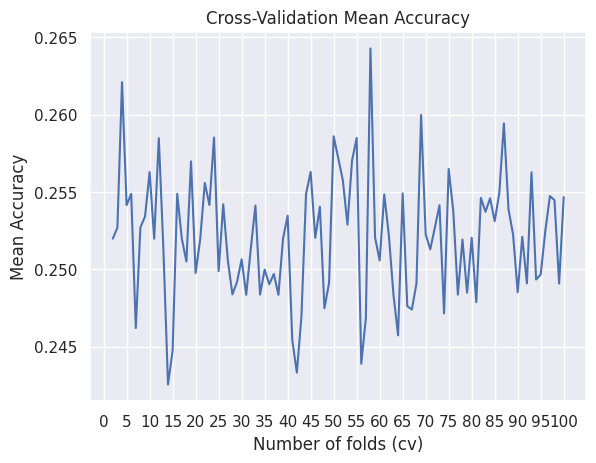

In [72]:
# con questo codice andiamo a cercare di ottimizzare la cross-validation
# questo esperimento è stato condotto con 30, 100 fold che sono stati documentati
evaluate_classifiers_with_plot(range(2,101), classifier_modelSVC2, X, y, 5)

#### Conclusioni sul Support vector macchine
Anche i tre modelli di Support vector macchine si sono rilevelati non efficaci almeno per i risultati che vorremmo ottenere. Dei tre modelli testati dalle analisi raccolte i migliori si sono dimostrati il LinearSupport vectore macchine e il Nu Support vector macchine entrambi si guadagnano un posto come possibili candidati per ulteriori investigazioni sull'ottimizzazione dei parametri.

## Sthocastic gradient descent classifier

In [56]:
from sklearn.linear_model import SGDClassifier

# Istanziazzione del modello sthocastic gradient descent classifier
sgd_classifier = SGDClassifier(loss='log', random_state=42)

# usiamo la cross-val
scores_SDG = cross_val_score(sgd_classifier, X, y, cv=10)
mean_accurancy_SDG = scores_SDG.mean()
print("Accurancy su ogni ciclo della cross-validation:", scores_SDG)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy_SDG)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Accurancy su ogni ciclo della cross-validation: [0.25179856 0.25179856 0.23741007 0.23741007 0.24460432 0.26086957
 0.26811594 0.23913043 0.27536232 0.25362319]
Accurancy mediata su i 10 fold fatti: 0.25201230320091755


In [58]:
# Andiamo a verificare le performance del sthocastic gradient descent classifier sui principali
# valori di fold usati per la cross-val
classifier_modelSDG = [SGDClassifier]
evaluate_classifiers(values, classifier_modelSDG, X, y)

Classifier: <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
CV: 5
Mean Accuracy: 0.23826714801444043
Scores: [0.23826715 0.2599278  0.22743682 0.24909747 0.2166065 ]
__________________________________________________________________________
##########################################################################
 
CV: 10
Mean Accuracy: 0.2519497445521843
Scores: [0.25179856 0.25899281 0.25899281 0.27338129 0.26618705 0.26086957
 0.23913043 0.20289855 0.25362319 0.25362319]
__________________________________________________________________________
##########################################################################
 
CV: 15
Mean Accuracy: 0.24768583450210377
Scores: [0.24731183 0.25806452 0.19354839 0.25806452 0.23655914 0.26086957
 0.26086957 0.23913043 0.2826087  0.23913043 0.25       0.22826087
 0.26086957 0.26086957 0.23913043]
__________________________________________________________________________
########################################################

Classifier: <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
CV: 2
Mean Accuracy: 0.24764678160631917
Scores: [0.25685426 0.23843931]
__________________________________________________________________________
##########################################################################
 
CV: 3
Mean Accuracy: 0.26425863844518943
Scores: [0.27056277 0.25974026 0.26247289]
__________________________________________________________________________
##########################################################################
 
CV: 4
Mean Accuracy: 0.2649839249720978
Scores: [0.26224784 0.26300578 0.26589595 0.26878613]
__________________________________________________________________________
##########################################################################
 
CV: 5
Mean Accuracy: 0.251985559566787
Scores: [0.2599278  0.2599278  0.25631769 0.22382671 0.2599278 ]
__________________________________________________________________________
####################################

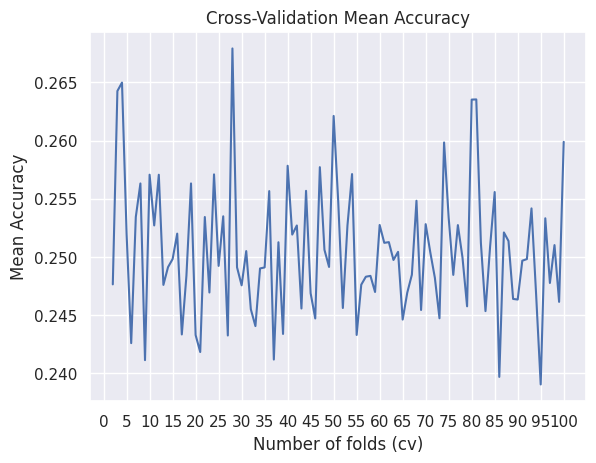

In [60]:
# con questo codice andiamo a cercare di ottimizzare la cross-validation
# questo esperimento è stato condotto con 30, 100 fold che sono stati documentati
evaluate_classifiers_with_plot(range(2,101), classifier_modelSDG, X, y, 5)

#### Cocnlusionni sul modello Sthocastic gradient descent classifier
Ultimo modello testato con il quale si chiude la nostra serie di esperimenti. Il SGDC si è dimosrato anche esso abbastanza stabile nel senso che se pur osccillando oscilla in un intervallo stretto tra 24% e 26%  con performance medie superiori al 25% e picchi oltre il 26% potrebbe essere tra i modelli selzionati per future ottimizzazioni.